## N.Harshith(17507)

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np

In [ ]:
directory = "D:\Data\genres_original"
f= open("D:\Data\my.dat" ,'wb')
i=0

for folder in os.listdir(directory):
    i+=1
    if i==11 :
        break   
    k = 0    
    for file in os.listdir(directory+"\\"+folder):  
        (rate,sig) = wav.read(directory+"\\"+folder+"\\"+file)
        mfcc_feat = mfcc(sig,rate ,winlen=0.020, appendEnergy = False)
        covariance = np.cov(np.matrix.transpose(mfcc_feat))
        mean_matrix = mfcc_feat.mean(0)
        feature = (mean_matrix , covariance , i)
        pickle.dump(feature , f)

f.close()

In [2]:
dataset = []
with open('D:\Data\my.dat','rb') as f:
    while True:
        
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  

In [3]:
def column(matrix, i):
    return [row[i] for row in matrix]
df = column(dataset,0)
output = column(dataset,2)

In [4]:
data = pd.DataFrame(df)
data.columns = ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13']
data['Gerne'] = output

In [5]:
data.head(10)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Gerne
0,76.502611,-1.961417,-15.774347,3.831419,-10.473326,1.311828,-19.393732,5.286790,-16.631725,5.353444,-9.856570,6.250077,-5.587495,1
1,66.931650,0.718853,-3.267830,4.181200,-8.050941,6.448259,-17.768517,14.091810,-18.332536,3.685560,-10.550744,2.887485,-7.788083,1
2,78.774103,3.039700,-19.024435,-0.983591,-14.699337,7.586562,-12.823053,1.892920,-14.865326,3.595252,-13.961705,1.066102,-6.196685,1
3,66.696107,9.211514,-4.532876,5.027148,-8.254011,8.101201,-9.676610,9.824043,-6.735213,10.332956,-10.185683,5.412514,-6.100144,1
4,71.972846,0.506410,-23.834838,-2.181944,-29.875498,0.719521,-19.039014,-1.353935,-13.370416,5.069944,-11.607831,-1.471467,-4.666507,1
5,70.698844,1.934571,-15.944919,3.166872,-26.358143,1.128209,-24.882273,-0.191092,-16.766228,0.711137,-18.851825,-0.644119,-6.869546,1
6,68.692741,10.880354,-23.866647,5.221744,-3.252469,-4.578671,-27.950562,-3.557310,-11.635526,-3.206450,-12.685061,-3.727947,-7.546920,1
7,70.002915,6.965918,-18.716814,8.841961,-8.010160,3.434492,-31.360023,1.699708,-18.679157,-6.934995,-12.810980,-4.711064,-6.552718,1
8,75.992583,-2.058076,-11.747981,8.439767,-6.854579,6.521593,-19.540976,14.718525,-10.241315,13.498995,-10.820625,0.519533,-14.151505,1
9,67.149478,-0.723351,-12.984549,6.237449,-26.225981,-4.279666,-17.719844,6.351006,-21.535698,4.603909,-9.379431,4.145730,-1.935425,1


In [6]:
np.sum(data.isnull())

mfcc1     0
mfcc2     0
mfcc3     0
mfcc4     0
mfcc5     0
mfcc6     0
mfcc7     0
mfcc8     0
mfcc9     0
mfcc10    0
mfcc11    0
mfcc12    0
mfcc13    0
Gerne     0
dtype: int64

In [7]:
dk = data.copy()

In [8]:
scalar = StandardScaler()
x  = scalar.fit_transform(np.array(data.iloc[:,0:12],dtype = float))

In [9]:
data.describe()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Gerne
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,73.866122,-5.890262,-11.336513,4.295260,-7.467309,-0.158824,-9.599897,2.423718,-10.217193,2.447856,-7.396778,1.543461,-4.674739,5.499499
std,9.724262,9.657244,9.171090,8.555793,7.201769,7.982790,7.727431,7.378775,7.072678,5.809610,6.074758,4.648826,4.700329,2.875114
min,30.378973,-31.294026,-39.537797,-21.525517,-31.056114,-23.118175,-31.360023,-20.515375,-32.389660,-15.278950,-28.182356,-13.552082,-19.171433,1.000000
25%,68.621079,-13.334821,-17.526192,-1.990189,-12.628428,-5.945032,-15.642584,-2.943622,-15.007248,-1.758057,-11.447778,-1.795939,-8.094448,3.000000
50%,76.203630,-7.746220,-12.142107,4.514891,-7.555003,-0.144829,-10.585874,2.861116,-10.241315,2.601650,-7.585597,1.530402,-4.869434,5.000000
75%,80.694701,0.840393,-5.219596,9.917884,-2.600570,6.035814,-3.812833,8.065357,-4.848459,6.603367,-3.025675,4.844360,-1.182830,8.000000
max,90.429022,22.363511,19.638186,30.350868,12.653904,20.000996,13.852516,26.423791,6.290688,18.861276,17.280857,14.378774,10.739504,10.000000


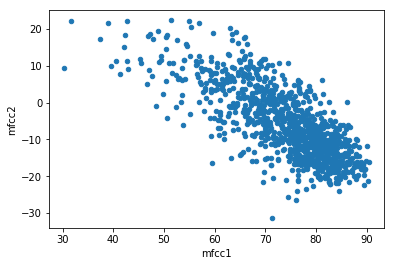

In [10]:
data.plot.scatter('mfcc1','mfcc2')

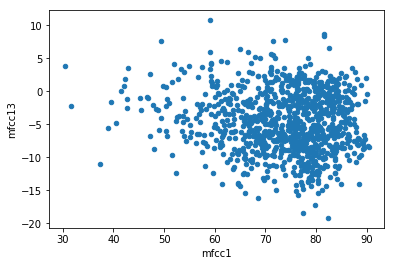

In [11]:
data.plot.scatter('mfcc1','mfcc13')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202D515D5F8>,
      dtype=object)

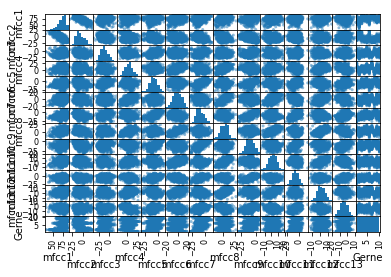

In [12]:
pd.plotting.scatter_matrix(data)

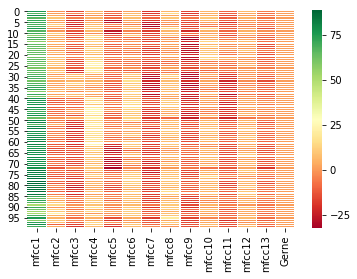

In [13]:
ht = data[0:100]
sns.heatmap(ht,cmap='RdYlGn',linewidths=0.1)

In [32]:
#data.drop('mfcc4',axis='column',inplace=True)
#data.drop('mfcc7',axis='column',inplace=True)

In [14]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [15]:
def nearestClass(neighbors):
    classVote = {}
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1 
        else:
            classVote[response]=1
    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [16]:
def getAccuracy(testSet, predictions):
    correct = 0 
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)


In [17]:
dataset = []
def loadDataset(filename , split , trSet , teSet):
    with open('D:\Data\my.dat','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  
    for x in range(len(dataset)):
        if random.random() <split :      
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])  
trainingSet = []
testSet = []
loadDataset("my.dat" , 0.66, trainingSet, testSet)

In [18]:
def distance(instance1 , instance2 , k ):
    distance =0 
    mm1 = instance1[0] 
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1)) 
    distance+=(np.dot(np.dot((mm2-mm1).transpose() , np.linalg.inv(cm2)) , mm2-mm1 )) 
    distance+= np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance-= k
    return distance

In [38]:
accuracy = []
for i in range(1,10):
    leng = len(testSet)
    predictions = []
    for x in range (leng):
        predictions.append(nearestClass(getNeighbors(trainingSet ,testSet[x] ,i))) 
    accuracy.append(getAccuracy(testSet , predictions))
print(accuracy)

[0.683076923076923, 0.683076923076923, 0.6676923076923077, 0.683076923076923, 0.683076923076923, 0.683076923076923, 0.6676923076923077, 0.6676923076923077, 0.6615384615384615]


K Means

In [20]:
train, validate, test = np.split(dk.sample(frac=1, random_state=42), [int(.6*len(dk)), int(.8*len(dk))])

In [21]:
train1 = train.drop('Gerne',axis='columns')
y_train = train['Gerne']

In [22]:
kmeans = KMeans(n_clusters=9, algorithm = 'auto')
kmeans.fit(train1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
prediction = kmeans.predict(train1)    

In [24]:
accuracy_score(prediction,y_train)

0.04006677796327212

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(np.array(train1))

In [26]:
kmeans = KMeans(n_clusters=9, max_iter= 100,algorithm = 'auto')
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
prediction = kmeans.predict(train1)  
accuracy_score(prediction,y_train)

0.035058430717863104